<h1>AtliQ Hotels Data Analysis Project<h1>

# Problem Statement

Atliq Grands, a hotel chain operating across multiple cities in India, is currently encountering stiff competition within its segment, resulting in a decline in revenue and market share.To turn things around, they want to analyze data from May 2022 to June 2022.The primary goal is to utilize Python's built-in libraries to extract valuable insights from provided datasets, focusing on aspects such as ratings, realized revenue, occupancy percentage, and other metrics.

# 1. Exploratory Data Analysis 

In [754]:
import pandas as pd
from matplotlib import pyplot as plt

In [755]:
df_bookings = pd.read_csv('fact_bookings.csv')
df_date = pd.read_csv('dim_date.csv')
df_hotels = pd.read_csv('dim_hotels.csv')
df_rooms = pd.read_csv('dim_rooms.csv')
df_agg_bookings = pd.read_csv('fact_aggregated_bookings.csv')

**Exploring Booking Dataset**

In [756]:
df_bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920


In [757]:
df_bookings.shape

(134590, 12)

In [758]:
df_bookings.room_category.unique()

array(['RT1', 'RT2', 'RT3', 'RT4'], dtype=object)

In [759]:
df_bookings.booking_platform.unique()

array(['direct online', 'others', 'logtrip', 'tripster', 'makeyourtrip',
       'journey', 'direct offline'], dtype=object)

In [760]:
df_bookings.booking_platform.value_counts()

others            55066
makeyourtrip      26898
logtrip           14756
direct online     13379
tripster           9630
journey            8106
direct offline     6755
Name: booking_platform, dtype: int64

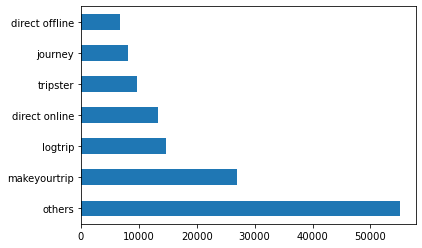

In [761]:
df_bookings.booking_platform.value_counts().plot(kind = 'barh')
plt.show()

In [762]:
df_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


**Exploring Hotels Dataset**

In [763]:
df_hotels.head()

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


In [764]:
df_hotels.category.value_counts()

Luxury      16
Business     9
Name: category, dtype: int64

In [765]:
df_hotels.shape

(25, 4)

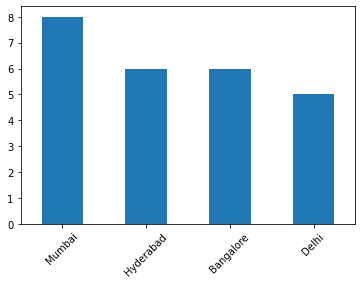

In [766]:
df_hotels.city.value_counts().sort_values(ascending =False).plot(kind = 'bar')
plt.xticks(rotation = 45)
plt.show()

**Exploring Date Dataset**

In [767]:
df_date.head()

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday
3,04-May-22,May 22,W 19,weekeday
4,05-May-22,May 22,W 19,weekeday


In [768]:
df_date.shape

(92, 4)

**Exploring Rooms Dataset**

In [769]:
df_rooms.head()

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


In [770]:
df_rooms.shape

(4, 2)

**Exploring Aggregate Bookings Dataset**

In [771]:
df_agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
3,17558,1-May-22,RT1,30,19.0
4,16558,1-May-22,RT1,18,19.0


**Exercise-1. Find out unique property ids in aggregate bookings dataset**

In [772]:
df_agg_bookings.property_id.unique()

array([16559, 19562, 19563, 17558, 16558, 17560, 19558, 19560, 17561,
       16560, 16561, 16562, 16563, 17559, 17562, 17563, 18558, 18559,
       18561, 18562, 18563, 19559, 19561, 17564, 18560], dtype=int64)

**Exercise-2. Find out total bookings per property_id**

In [773]:
property_calc = df_agg_bookings.groupby('property_id')
property_calc['successful_bookings'].sum()

property_id
16558    3153
16559    7338
16560    4693
16561    4418
16562    4820
16563    7211
17558    5053
17559    6142
17560    6013
17561    5183
17562    3424
17563    6337
17564    3982
18558    4475
18559    5256
18560    6638
18561    6458
18562    7333
18563    4737
19558    4400
19559    4729
19560    6079
19561    5736
19562    5812
19563    5413
Name: successful_bookings, dtype: int64

**Exercise-3. Find out days on which bookings are greater than capacity**

In [774]:
df_agg_bookings[(df_agg_bookings.successful_bookings > df_agg_bookings.capacity)]

,property_id,check_in_date,room_category,successful_bookings,capacity
3,17558,1-May-22,RT1,30,19.0
12,16563,1-May-22,RT1,100,41.0
4136,19558,11-Jun-22,RT2,50,39.0
6209,19560,2-Jul-22,RT1,123,26.0
8522,19559,25-Jul-22,RT1,35,24.0
9194,18563,31-Jul-22,RT4,20,18.0


**Exercise-4. Find out properties that have highest capacity**

In [775]:
df_agg_bookings[df_agg_bookings.capacity == df_agg_bookings.capacity.max()]

,property_id,check_in_date,room_category,successful_bookings,capacity
27,17558,1-May-22,RT2,38,50.0
128,17558,2-May-22,RT2,27,50.0
229,17558,3-May-22,RT2,26,50.0
328,17558,4-May-22,RT2,27,50.0
428,17558,5-May-22,RT2,29,50.0
...,...,...,...,...,...
8728,17558,27-Jul-22,RT2,22,50.0
8828,17558,28-Jul-22,RT2,21,50.0
8928,17558,29-Jul-22,RT2,23,50.0
9028,17558,30-Jul-22,RT2,32,50.0


# 2. DATA CLEANING

In [776]:
df_bookings.describe() #Cleaning invalid no_of_guests

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


In [777]:
df_bookings.shape

(134590, 12)

In [778]:
df_bookings[df_bookings.no_guests < 0 ]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
17924,May122218559RT44,18559,12/5/2022,12/5/2022,14-05-22,-10.0,RT4,direct online,NaN,No Show,20900,20900
18020,May122218561RT22,18561,8/5/2022,12/5/2022,14-05-22,-12.0,RT2,makeyourtrip,NaN,Cancelled,9000,3600
18119,May122218562RT311,18562,5/5/2022,12/5/2022,17-05-22,-6.0,RT3,direct offline,5.0,Checked Out,16800,16800
18121,May122218562RT313,18562,10/5/2022,12/5/2022,17-05-22,-4.0,RT3,direct online,NaN,Cancelled,14400,5760
56715,Jun082218562RT12,18562,5/6/2022,8/6/2022,13-06-22,-17.0,RT1,others,NaN,Checked Out,6500,6500
119765,Jul202219560RT220,19560,19-07-22,20-07-22,22-07-22,-1.0,RT2,others,NaN,Checked Out,13500,13500
134586,Jul312217564RT47,17564,30-07-22,31-07-22,1/8/2022,-4.0,RT4,logtrip,2.0,Checked Out,38760,38760


In [779]:
df_bookings= df_bookings[df_bookings.no_guests> 0 ] #to only include no_of_guests which are more than 0

In [780]:
df_bookings.shape #invalid guests removed

(134578, 12)

In [781]:
df_bookings.revenue_generated.min(),df_bookings.revenue_generated.max() #max value cannot be this (its a data error)

(6500, 28560000)

In [782]:
# we wilL use 3std for outlier removal

In [783]:
mean = df_bookings.revenue_generated.mean()
std =df_bookings.revenue_generated.std()
higher_limit  = mean + 3*std
higher_limit

294498.50173198653

In [784]:
df_bookings[df_bookings.revenue_generated > higher_limit] #invalid data

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
111,May012216559RT32,16559,29-04-22,1/5/2022,2/5/2022,6.0,RT3,direct online,NaN,Checked Out,28560000,28560
315,May012216562RT22,16562,28-04-22,1/5/2022,4/5/2022,2.0,RT2,direct offline,3.0,Checked Out,12600000,12600
562,May012217559RT118,17559,26-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,2000000,4420
129176,Jul282216562RT26,16562,21-07-22,28-07-22,29-07-22,2.0,RT2,direct online,3.0,Checked Out,10000000,12600


In [785]:
df_bookings= df_bookings[df_bookings.revenue_generated < higher_limit] #removed outliers

In [786]:
df_bookings.shape

(134573, 12)

In [787]:
df_bookings[df_bookings.revenue_realized == df_bookings.revenue_realized.max()]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
139,May012216559RT43,16559,1/5/2022,1/5/2022,2/5/2022,6.0,RT4,tripster,3.0,Checked Out,45220,45220
715,May012217560RT46,17560,28-04-22,1/5/2022,2/5/2022,6.0,RT4,makeyourtrip,3.0,Checked Out,45220,45220
719,May012217560RT410,17560,1/5/2022,1/5/2022,4/5/2022,6.0,RT4,others,2.0,Checked Out,45220,45220
2107,May022216559RT47,16559,28-04-22,2/5/2022,4/5/2022,6.0,RT4,logtrip,NaN,Checked Out,45220,45220
2381,May022217558RT42,17558,25-04-22,2/5/2022,8/5/2022,6.0,RT4,makeyourtrip,3.0,Checked Out,45220,45220
...,...,...,...,...,...,...,...,...,...,...,...,...
132069,Jul302217563RT414,17563,30-07-22,30-07-22,3/8/2022,6.0,RT4,logtrip,NaN,Checked Out,45220,45220
133389,Jul312217558RT42,17558,28-07-22,31-07-22,1/8/2022,6.0,RT4,makeyourtrip,2.0,Checked Out,45220,45220
133453,Jul312217559RT45,17559,26-07-22,31-07-22,6/8/2022,6.0,RT4,makeyourtrip,5.0,Checked Out,45220,45220
133456,Jul312217559RT48,17559,29-07-22,31-07-22,2/8/2022,6.0,RT4,makeyourtrip,4.0,Checked Out,45220,45220


Our higher limit was  294498.50173198653 but max revenue_realized = 45k this is because rt4 is presidential suite ,which is usually expensive.

In [788]:
df_bookings[df_bookings.room_category == 'RT4'].revenue_realized.describe()

count    16071.000000
mean     23439.308444
std       9048.599076
min       7600.000000
25%      19000.000000
50%      26600.000000
75%      32300.000000
max      45220.000000
Name: revenue_realized, dtype: float64

In [789]:
 23439.308444 + 3*9048.599076

50585.105672000005

We can see the this method for rt4 room is giving around 50k revenue.So logically 45k for a presidential suite is valid.

In [790]:
df_bookings.isnull().sum()

booking_id               0
property_id              0
booking_date             0
check_in_date            0
checkout_date            0
no_guests                0
room_category            0
booking_platform         0
ratings_given        77897
booking_status           0
revenue_generated        0
revenue_realized         0
dtype: int64

Ratings given has 77897 null values. But we will not do anything over here because pracically people usually tend to forget or dont give ratings when they checkout.

In [791]:
df_agg_bookings.describe()

,property_id,successful_bookings,capacity
count,9200.000000,9200.000000,9198.000000
mean,18040.640000,14.655761,25.280496
std,1099.818325,7.736170,11.442080
min,16558.000000,1.000000,3.000000
25%,17558.000000,9.000000,18.000000
50%,17564.000000,14.000000,25.000000
75%,18563.000000,19.000000,34.000000
max,19563.000000,123.000000,50.000000


In [792]:
df_agg_bookings.isnull().sum()

property_id            0
check_in_date          0
room_category          0
successful_bookings    0
capacity               2
dtype: int64

**Exercise-1. In aggregate bookings find columns that have null values. Fill these null values with whatever you think is the appropriate subtitute (possible ways is to use mean or median)**

In [793]:
df_agg_bookings[df_agg_bookings.capacity.isnull() == True] #We will fill the NA value with median value since capacity cannot be null

,property_id,check_in_date,room_category,successful_bookings,capacity
8,17561,1-May-22,RT1,22,NaN
14,17562,1-May-22,RT1,12,NaN


In [794]:
df_agg_bookings.capacity.fillna(df_agg_bookings.capacity.median(),inplace = True)

In [795]:
df_agg_bookings.iloc[[8,14]]

,property_id,check_in_date,room_category,successful_bookings,capacity
8,17561,1-May-22,RT1,22,25.0
14,17562,1-May-22,RT1,12,25.0


In [796]:
df_agg_bookings.isnull().sum()

property_id            0
check_in_date          0
room_category          0
successful_bookings    0
capacity               0
dtype: int64

**Exercise-2. In aggregate bookings find out records that have successful_bookings value greater than capacity. Filter those records**

In [797]:
df_agg_bookings[df_agg_bookings.successful_bookings > df_agg_bookings.capacity]

,property_id,check_in_date,room_category,successful_bookings,capacity
3,17558,1-May-22,RT1,30,19.0
12,16563,1-May-22,RT1,100,41.0
4136,19558,11-Jun-22,RT2,50,39.0
6209,19560,2-Jul-22,RT1,123,26.0
8522,19559,25-Jul-22,RT1,35,24.0
9194,18563,31-Jul-22,RT4,20,18.0


In [798]:
df_agg_bookings.shape

(9200, 5)

In [799]:
df_agg_bookings = df_agg_bookings[df_agg_bookings.successful_bookings <= df_agg_bookings.capacity]

In [800]:
df_agg_bookings.shape

(9194, 5)

# 3. DATA TRANSFORMATION

Create occupancy percentage column

In [801]:
df_agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
4,16558,1-May-22,RT1,18,19.0
5,17560,1-May-22,RT1,28,40.0


In [802]:
df_agg_bookings['Occupancy %'] = df_agg_bookings['successful_bookings']/df_agg_bookings['capacity']

In [803]:
df_agg_bookings['Occupancy %'] = df_agg_bookings['Occupancy %'].apply(lambda x : round(x*100,2))

In [804]:
df_agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,Occupancy %
0,16559,1-May-22,RT1,25,30.0,83.33
1,19562,1-May-22,RT1,28,30.0,93.33
2,19563,1-May-22,RT1,23,30.0,76.67
4,16558,1-May-22,RT1,18,19.0,94.74
5,17560,1-May-22,RT1,28,40.0,70.00


# 4. Insights Generation

**1.Average occupancy rate in each of the room categories:**

In [805]:
df_occupancy = df_agg_bookings.groupby('room_category')['Occupancy %'].mean()

In [806]:
df_occupancy

room_category
RT1    57.889643
RT2    58.009756
RT3    58.028213
RT4    59.277925
Name: Occupancy %, dtype: float64

In [807]:
df_rooms.head()

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


In [808]:
pd.merge(df_rooms,df_occupancy,left_on = 'room_id',right_on = 'room_category')

,room_id,room_class,Occupancy %
0,RT1,Standard,57.889643
1,RT2,Elite,58.009756
2,RT3,Premium,58.028213
3,RT4,Presidential,59.277925


**2. Average occupancy rate per city**

In [809]:
df_agg_bookings

,property_id,check_in_date,room_category,successful_bookings,capacity,Occupancy %
0,16559,1-May-22,RT1,25,30.0,83.33
1,19562,1-May-22,RT1,28,30.0,93.33
2,19563,1-May-22,RT1,23,30.0,76.67
4,16558,1-May-22,RT1,18,19.0,94.74
5,17560,1-May-22,RT1,28,40.0,70.00
...,...,...,...,...,...,...
9195,16563,31-Jul-22,RT4,13,18.0,72.22
9196,16559,31-Jul-22,RT4,13,18.0,72.22
9197,17558,31-Jul-22,RT4,3,6.0,50.00
9198,19563,31-Jul-22,RT4,3,6.0,50.00


In [810]:
df_hotels.head()

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


In [811]:
df = pd.merge(df_agg_bookings,df_hotels,on = 'property_id') #Merging since city column is not there in df_agg_bookings

In [812]:
df.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,Occupancy %,property_name,category,city
0,16559,1-May-22,RT1,25,30.0,83.33,Atliq Exotica,Luxury,Mumbai
1,16559,1-May-22,RT2,35,41.0,85.37,Atliq Exotica,Luxury,Mumbai
2,16559,1-May-22,RT3,27,32.0,84.38,Atliq Exotica,Luxury,Mumbai
3,16559,1-May-22,RT4,17,18.0,94.44,Atliq Exotica,Luxury,Mumbai
4,16559,2-May-22,RT1,20,30.0,66.67,Atliq Exotica,Luxury,Mumbai


In [813]:
df.groupby('city')['Occupancy %'].mean().round(2)

city
Bangalore    56.33
Delhi        61.51
Hyderabad    58.12
Mumbai       57.91
Name: Occupancy %, dtype: float64

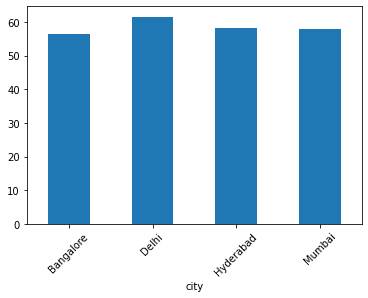

In [814]:
df.groupby('city')['Occupancy %'].mean().round(2).plot(kind ='bar')
plt.xticks(rotation = 45)
plt.show()

**3. When was the occupancy better? Weekday or Weekend?**

In [815]:
df_date.head()

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday
3,04-May-22,May 22,W 19,weekeday
4,05-May-22,May 22,W 19,weekeday


In [816]:
df = pd.merge(df,df_date,left_on = 'check_in_date',right_on = 'date')

In [817]:
df.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,Occupancy %,property_name,category,city,date,mmm yy,week no,day_type
0,16559,10-May-22,RT2,25,41.0,60.98,Atliq Exotica,Luxury,Mumbai,10-May-22,May 22,W 20,weekeday
1,16559,10-May-22,RT1,18,30.0,60.00,Atliq Exotica,Luxury,Mumbai,10-May-22,May 22,W 20,weekeday
2,16559,10-May-22,RT3,20,32.0,62.50,Atliq Exotica,Luxury,Mumbai,10-May-22,May 22,W 20,weekeday
3,16559,10-May-22,RT4,13,18.0,72.22,Atliq Exotica,Luxury,Mumbai,10-May-22,May 22,W 20,weekeday
4,19562,10-May-22,RT1,18,30.0,60.00,Atliq Bay,Luxury,Bangalore,10-May-22,May 22,W 20,weekeday


In [818]:
pie_df = df.groupby('day_type')['Occupancy %'].mean().round(2)
pie_df

day_type
weekeday    50.88
weekend     72.34
Name: Occupancy %, dtype: float64

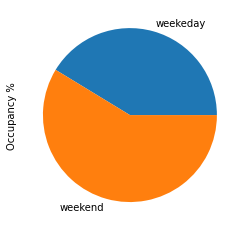

In [819]:
df.groupby('day_type')['Occupancy %'].mean().round(2).plot(kind = 'pie')
plt.show()

**4: In the month of June, what is the occupancy for different cities**

In [820]:
df_june = df[df['mmm yy'] == 'Jun 22']

In [821]:
df_june.groupby('city')['Occupancy %'].mean().round(2).sort_values(ascending = False)

city
Delhi        62.47
Hyderabad    58.46
Mumbai       58.38
Bangalore    56.44
Name: Occupancy %, dtype: float64

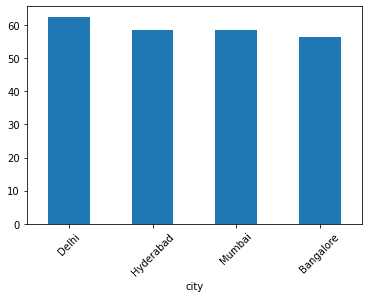

In [822]:
df_june.groupby('city')['Occupancy %'].mean().round(2).sort_values(ascending = False).plot(kind = 'bar')
plt.xticks(rotation = 45)
plt.show()

**5: We got new data for the month of august. Append that to existing data**

In [823]:
df_august = pd.read_csv('new_data_august.csv')

In [824]:
df_august

,property_id,property_name,category,city,room_category,room_class,check_in_date,mmm yy,week no,day_type,successful_bookings,capacity,occ%
0,16559,Atliq Exotica,Luxury,Mumbai,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,30,30,100.00
1,19562,Atliq Bay,Luxury,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,21,30,70.00
2,19563,Atliq Palace,Business,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,23,30,76.67
3,19558,Atliq Grands,Luxury,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,30,40,75.00
4,19560,Atliq City,Business,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,20,26,76.92
5,17561,Atliq Blu,Luxury,Mumbai,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,18,26,69.23
6,17564,Atliq Seasons,Business,Mumbai,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,10,16,62.50


In [825]:
latest_df = pd.concat([df,df_august],ignore_index = True)

In [826]:
latest_df.tail()

,property_id,check_in_date,room_category,successful_bookings,capacity,Occupancy %,property_name,category,city,date,mmm yy,week no,day_type,room_class,occ%
6499,19563,01-Aug-22,RT1,23,30.0,NaN,Atliq Palace,Business,Bangalore,NaN,Aug-22,W 32,weekeday,Standard,76.67
6500,19558,01-Aug-22,RT1,30,40.0,NaN,Atliq Grands,Luxury,Bangalore,NaN,Aug-22,W 32,weekeday,Standard,75.00
6501,19560,01-Aug-22,RT1,20,26.0,NaN,Atliq City,Business,Bangalore,NaN,Aug-22,W 32,weekeday,Standard,76.92
6502,17561,01-Aug-22,RT1,18,26.0,NaN,Atliq Blu,Luxury,Mumbai,NaN,Aug-22,W 32,weekeday,Standard,69.23
6503,17564,01-Aug-22,RT1,10,16.0,NaN,Atliq Seasons,Business,Mumbai,NaN,Aug-22,W 32,weekeday,Standard,62.50


**6. Print revenue realized per city**

In [827]:
df_bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100
6,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
7,May012216558RT18,16558,26-04-22,1/5/2022,3/5/2022,2.0,RT1,logtrip,NaN,No Show,9100,9100


In [828]:
df_revenue = pd.merge(df_bookings,df_hotels, on = 'property_id')

In [829]:
df_revenue.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
1,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi
2,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi
3,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
4,May012216558RT18,16558,26-04-22,1/5/2022,3/5/2022,2.0,RT1,logtrip,NaN,No Show,9100,9100,Atliq Grands,Luxury,Delhi


In [830]:
df_revenue.groupby('city')['revenue_realized'].sum()

city
Bangalore    420383550
Delhi        294404488
Hyderabad    325179310
Mumbai       668569251
Name: revenue_realized, dtype: int64

**7.Print month by month revenue**

In [831]:
df_revenue['check_in_date'] = pd.to_datetime(df_revenue['check_in_date'])

In [832]:
df_date['date'] = pd.to_datetime(df_date['date'])

In [833]:
df_revenue = pd.merge(df_revenue,df_date,left_on = 'check_in_date',right_on = 'date')

In [835]:
df_revenue.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city,date,mmm yy,week no,day_type
0,May052216558RT11,16558,15-04-22,2022-05-05,7/5/2022,3.0,RT1,tripster,5.0,Checked Out,10010,10010,Atliq Grands,Luxury,Delhi,2022-05-05,May 22,W 19,weekeday
1,May052216558RT12,16558,30-04-22,2022-05-05,7/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi,2022-05-05,May 22,W 19,weekeday
2,May052216558RT13,16558,1/5/2022,2022-05-05,6/5/2022,3.0,RT1,direct offline,5.0,Checked Out,10010,10010,Atliq Grands,Luxury,Delhi,2022-05-05,May 22,W 19,weekeday
3,May052216558RT14,16558,3/5/2022,2022-05-05,6/5/2022,2.0,RT1,tripster,3.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi,2022-05-05,May 22,W 19,weekeday
4,May052216558RT15,16558,30-04-22,2022-05-05,10/5/2022,4.0,RT1,others,4.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi,2022-05-05,May 22,W 19,weekeday


In [836]:
df_revenue.groupby('mmm yy')['revenue_realized'].sum()

mmm yy
Jul 22    389940912
Jun 22    377191229
May 22    408375641
Name: revenue_realized, dtype: int64

**8. Print revenue realized per hotel type**

In [837]:
df_revenue.groupby('property_name')['revenue_realized'].sum().sort_values(ascending = False)

property_name
Atliq Exotica    219076161
Atliq Palace     209474575
Atliq City       196555383
Atliq Bay        179416721
Atliq Blu        179203544
Atliq Grands     145860641
Atliq Seasons     45920757
Name: revenue_realized, dtype: int64

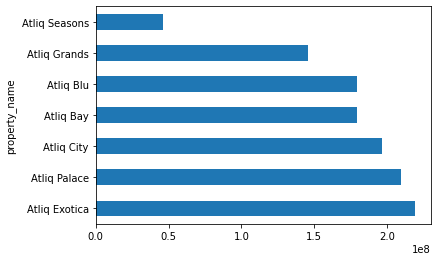

In [840]:
df_revenue.groupby('property_name')['revenue_realized'].sum().sort_values(ascending = False).plot(kind = 'barh')
plt.show()

**9. Print average rating per city**

In [841]:
df_revenue.groupby('city')['ratings_given'].mean().round(2)

city
Bangalore    3.40
Delhi        3.78
Hyderabad    3.66
Mumbai       3.64
Name: ratings_given, dtype: float64

**10. Print a pie chart of revenue realized per booking platform**

In [842]:
df_pie = df_revenue.groupby('booking_platform')['revenue_realized'].sum()
df_pie

booking_platform
direct offline     59298844
direct online     117245053
journey            71231599
logtrip           129036321
makeyourtrip      233132708
others            480698244
tripster           84865013
Name: revenue_realized, dtype: int64

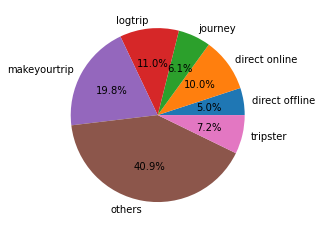

In [843]:
plt.pie(df_pie,labels = ['direct offline','direct online','journey','logtrip','makeyourtrip','others','tripster'],autopct = '%1.1f%%')
plt.show()